In [1]:
from tifffile import imread, imwrite
import os
from os.path import exists
import cv2
from matplotlib import cm
from matplotlib import colormaps
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
um_per_pixel = 0.117
s_per_frame = 2
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/example_tracks-timelapsePAINT/"
os.chdir(folder_save)

# load dataset
fname_csv = "20230928-FOV-4-condensateID-46-left.csv"

df = pd.read_csv(fname_csv)

# color
cmap_color_end = "#00FFFF"
cmap_color_start = "black"
cmap_name = "dark2cyan"
cmap_img = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

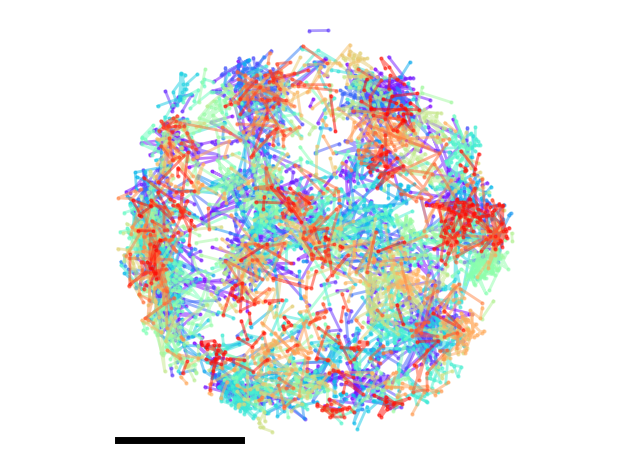

In [40]:
cmap_tracks = colormaps["rainbow"]

trackIDs = sorted(df[df["trackID"].notna()]["trackID"].unique())
s_per_frame = 0.04
video_length = (df["t"].max() - df["t"].min()) * s_per_frame

plt.figure()
for idx in trackIDs:
    df_current = df[df["trackID"] == idx]
    x = df_current["x"].to_numpy(float)
    y = df_current["y"].to_numpy(float)
    t = df_current["t"].to_numpy(float) * s_per_frame
    plt.plot(
        y,
        x,
        "-o",
        color=cmap_tracks(np.max(t) / video_length),
        lw=2,
        markersize=2,
        alpha=0.5,
    )

# # scale bar
scale_bar_offset = 0
scalebar_length_um = 1
base_x = 4
base_y = 4
scalebar_length_pxl = scalebar_length_um / um_per_pixel
plt.plot(
    [
        base_x + scale_bar_offset,
        base_x + scale_bar_offset + scalebar_length_pxl,
    ],
    [base_y + scale_bar_offset, base_y + scale_bar_offset],
    "-",
    color="black",
    lw=5,
)
# plt.xlim(zoom_in_x[0], zoom_in_x[1])
# plt.ylim(zoom_in_y[0], zoom_in_y[1])

plt.tight_layout()
plt.axis("equal")
plt.axis("off")
plt.tight_layout()
fname_save = fname_csv[:-4] + "-tracks_zoomed_in.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=300)
plt.show()

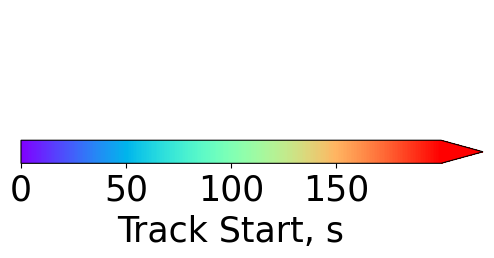

In [75]:
fontsize = 25
cmap_tracks = colormaps["rainbow"]
trackIDs = sorted(df[df["trackID"].notna()]["trackID"].unique())
s_per_frame = 0.04
video_length = (df["t"].max() - df["t"].min()) * s_per_frame

plt.figure(figsize=(6, 2))
cbar = plt.colorbar(
    cm.ScalarMappable(
        norm=clr.Normalize(0, video_length), cmap=cmap_tracks
    ),
    ax=plt.gca(),
    orientation="horizontal",
    drawedges=False,
    ticks=[0, 50, 100, 150],
    extendfrac=0.1,
    extend="max",
    # aspect=25,
)
cbar.set_label(
    label="Track Start, s",
    fontsize=fontsize,
    labelpad=5,
    # family="Arial",
)
plt.axis("off")
cbar.ax.tick_params(labelsize=fontsize)
plt.savefig("cbar.png", bbox_inches="tight", format="png", dpi=300)